In [2]:
import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Preprocessing import *
from utils.Plots import *
from utils.Segmentation import *

In [ ]:
# #Load the ESP1 Data and handle missing values
# df_one= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP1.csv')  
# missing_info = handle_missing_values_length_index(df_one)
# print(missing_info)
# output = '../../data/handlebar/Accelerometer_data_merged_ESP1_filled_missing_values.csv'
# fill_missing_values(df_one, output)
# missing_info = handle_missing_values_length_index(df_one)
# print(missing_info)


In [ ]:
# # Load the ESP2 Data and handle missing values
# df_two= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP2.csv')  
# missing_info = handle_missing_values_length_index(df_two)
# print(missing_info)
# output = '../../data/handlebar/Accelerometer_data_merged_ESP2_filled_missing_values.csv'
# fill_missing_values(df_two,output)
# missing_info = handle_missing_values_length_index(df_two)
# print(missing_info)


In [ ]:
# # Comine activities from ESP1 and ESP2 with correct Annotation
# output = '../../data/handlebar/Accelerometer_data_combined.csv'
# df_one= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP1_filled_missing_values.csv')
# df_two= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP2_filled_missing_values.csv')
# df_combined = combine_activities(df_one,df_two,output)

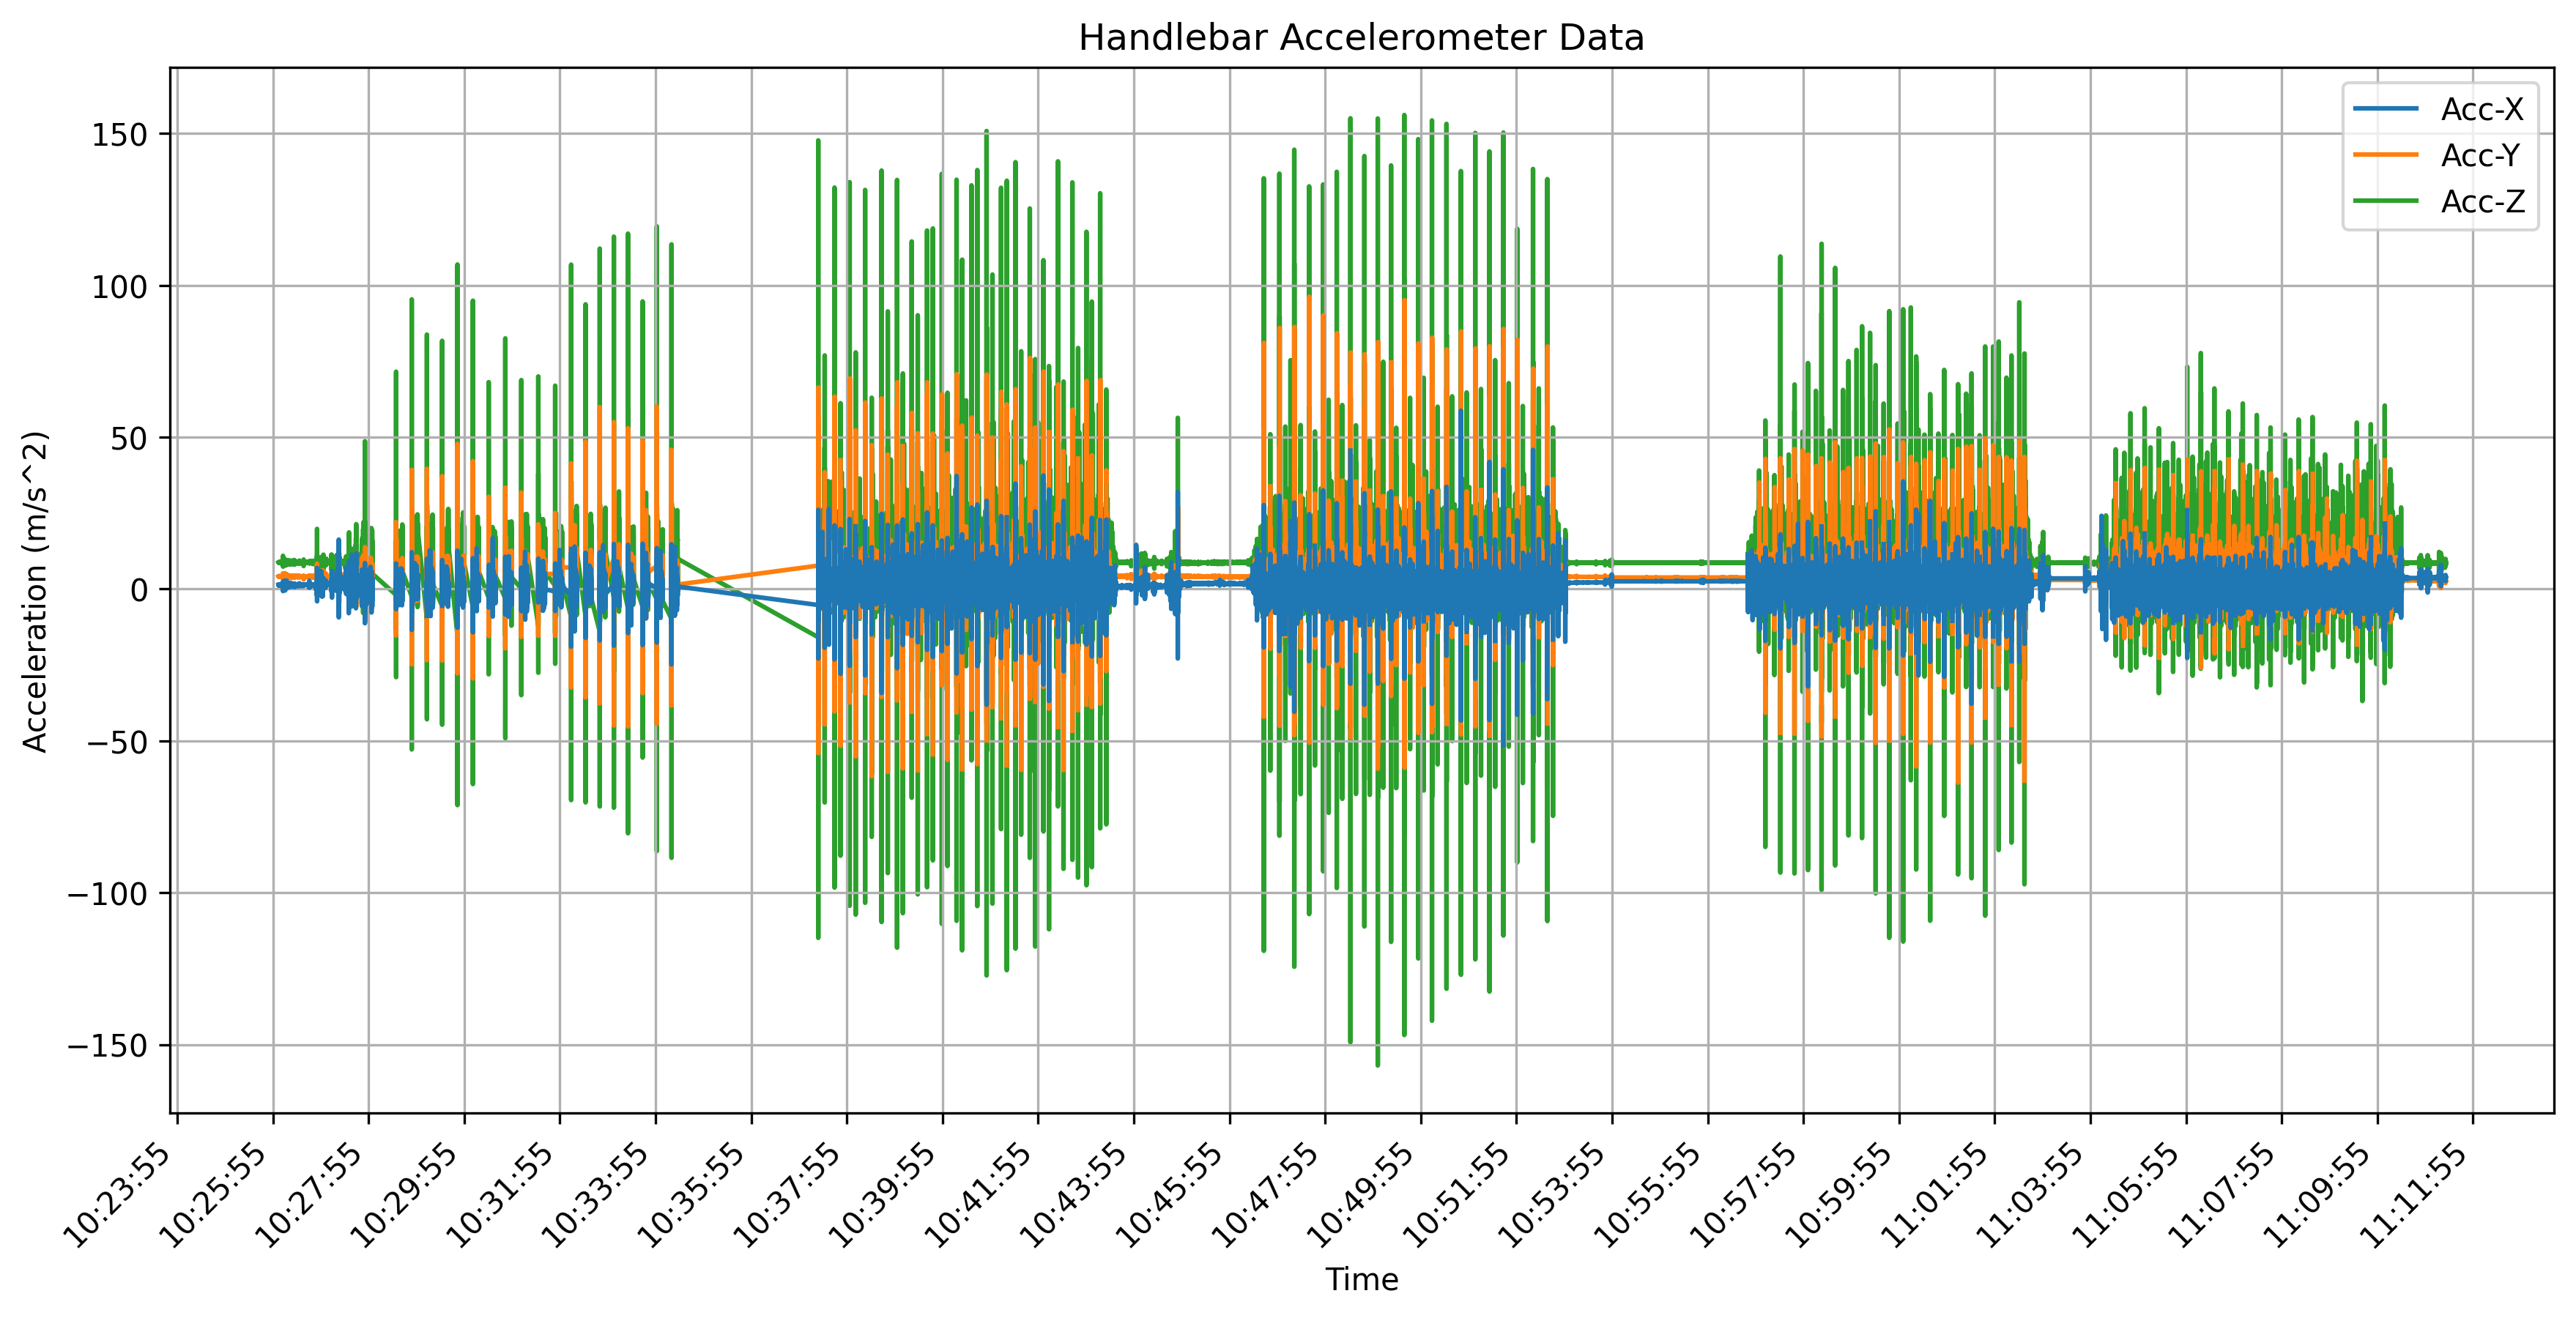

In [ ]:
# # plot the combined data
# df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
# name = 'Handlebar Accelerometer Data'
# plot_accelerometer_data(df, name)

In [9]:
# No overlapping segmentation and normal/abnormal classification
# df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
# output = '../../data/handlebar/Accelerometer_data_combined_segmented.csv'
# # Filter the DataFrame to include only the necessary columns
# df_filtered = df[['NTP','Acc-Z','curb_scene']]
# final_df = segment_acceleration_data_no_overlapping(df_filtered, output)

In [11]:
# No overlapping segmentation 
df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
df

,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
0,0,2024-07-24 10:26:01.863,1.417374,4.161118,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
1,1,2024-07-24 10:26:01.867,1.393433,4.161118,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
2,2,2024-07-24 10:26:01.872,1.407791,4.165909,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
3,3,2024-07-24 10:26:01.877,1.446091,4.170700,8.781937,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
4,4,2024-07-24 10:26:01.884,1.417374,4.175491,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465971,549101,2024-07-24 11:11:20.851,3.806778,2.609680,8.777145,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
465972,549102,2024-07-24 11:11:20.857,3.758896,2.652771,8.681381,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
465973,549103,2024-07-24 11:11:20.866,3.763687,2.796432,8.370132,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
465974,549104,2024-07-24 11:11:20.870,3.734955,2.839523,8.307877,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0


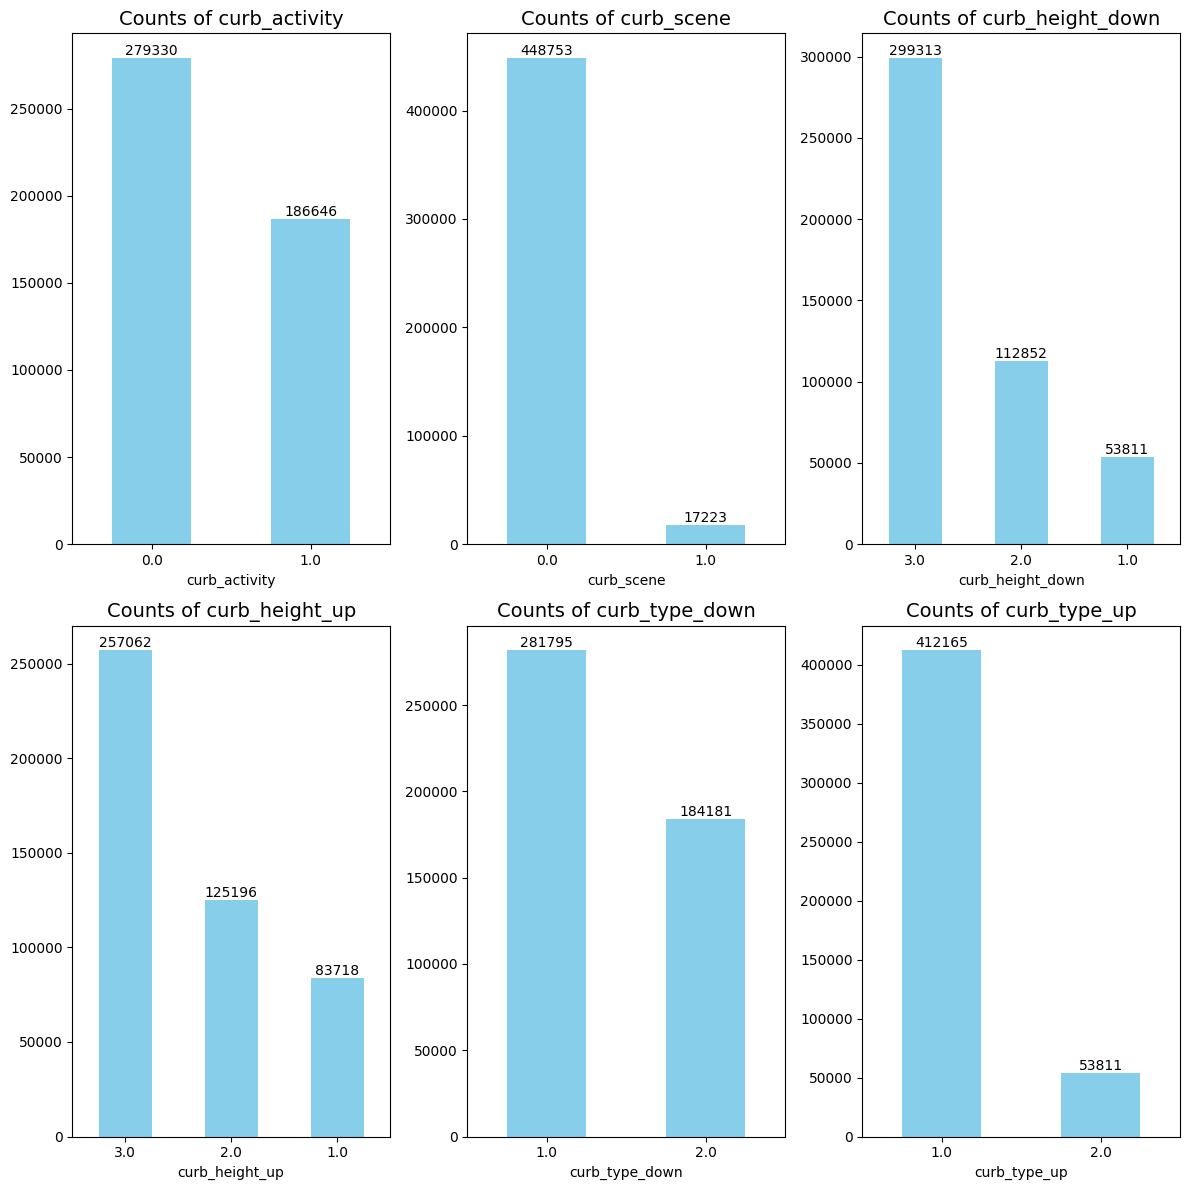

In [23]:
# List of attributes to visualize
attributes = ['curb_activity', 'curb_scene', 'curb_height_down', 'curb_height_up', 'curb_type_down', 'curb_type_up']

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through each attribute and create a bar chart
for i, attribute in enumerate(attributes):
    # Get value counts for the attribute
    attribute_counts = df[attribute].value_counts()

    # Plot the value counts as a bar chart
    bars = attribute_counts.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Counts of {attribute}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=0)

    # Add count numbers on top of the bars
    for bar in bars.patches:
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate
            bar.get_height() + 1,               # Y-coordinate (slightly above the bar)
            int(bar.get_height()),              # Text (the count)
            ha='center', va='bottom', fontsize=10
        )

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [29]:
df_curb_scene = df[df['curb_scene'] == 1.0]
df_curb_scene
#todo: give me some random examples if curb_activity is 1.0
df_curb_activity_up = df_curb_scene[df_curb_scene['curb_activity'] == 1.0]
df_curb_activity_up

,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
21827,21827,2024-07-24 10:27:50.309,NaN,NaN,-7.311890,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
21828,21828,2024-07-24 10:27:50.310,0.004791,7.762009,-7.311890,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
21829,21829,2024-07-24 10:27:50.315,-0.411804,7.412445,-10.376465,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
21830,21830,2024-07-24 10:27:50.320,-0.737411,5.066132,-7.747635,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
21831,21831,2024-07-24 10:27:50.325,-0.488419,5.200211,-0.421387,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451984,535114,2024-07-24 11:10:11.360,NaN,NaN,16.634918,1.721819e+12,1.0,1.0,3.0,1.0,2.0,1.0,0.0
451985,535115,2024-07-24 11:10:11.364,-3.304001,-4.563354,20.034683,1.721819e+12,1.0,1.0,3.0,1.0,2.0,1.0,0.0
451986,535116,2024-07-24 11:10:11.369,-1.599320,4.965576,11.468231,1.721819e+12,1.0,1.0,3.0,1.0,2.0,1.0,0.0
451987,535117,2024-07-24 11:10:11.375,-2.006348,11.396408,-6.042969,1.721819e+12,1.0,1.0,3.0,1.0,2.0,1.0,0.0


In [30]:
df_curb_activity_down = df_curb_scene[df_curb_scene['curb_activity'] == 0.0]
df_curb_activity_down

,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
55403,138258,2024-07-24 10:37:26.892,NaN,NaN,11.449066,1.721817e+12,0.0,1.0,2.0,3.0,1.0,1.0,2.0
55405,138259,2024-07-24 10:37:26.893,0.445328,2.221817,11.449066,1.721817e+12,0.0,1.0,2.0,3.0,1.0,1.0,2.0
55407,138260,2024-07-24 10:37:26.898,1.340759,5.702988,7.283157,1.721817e+12,0.0,1.0,2.0,3.0,1.0,1.0,2.0
55408,138261,2024-07-24 10:37:26.903,0.301666,6.622360,4.548981,1.721817e+12,0.0,1.0,2.0,3.0,1.0,1.0,2.0
55409,138262,2024-07-24 10:37:26.909,0.828400,5.755661,5.659897,1.721817e+12,0.0,1.0,2.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450606,533736,2024-07-24 11:10:04.562,NaN,NaN,33.518830,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0
450607,533737,2024-07-24 11:10:04.566,4.946426,1.608902,16.994050,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0
450608,533738,2024-07-24 11:10:04.571,-0.124496,4.831497,5.975922,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0
450609,533739,2024-07-24 11:10:04.576,-2.557007,5.803543,8.145081,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0


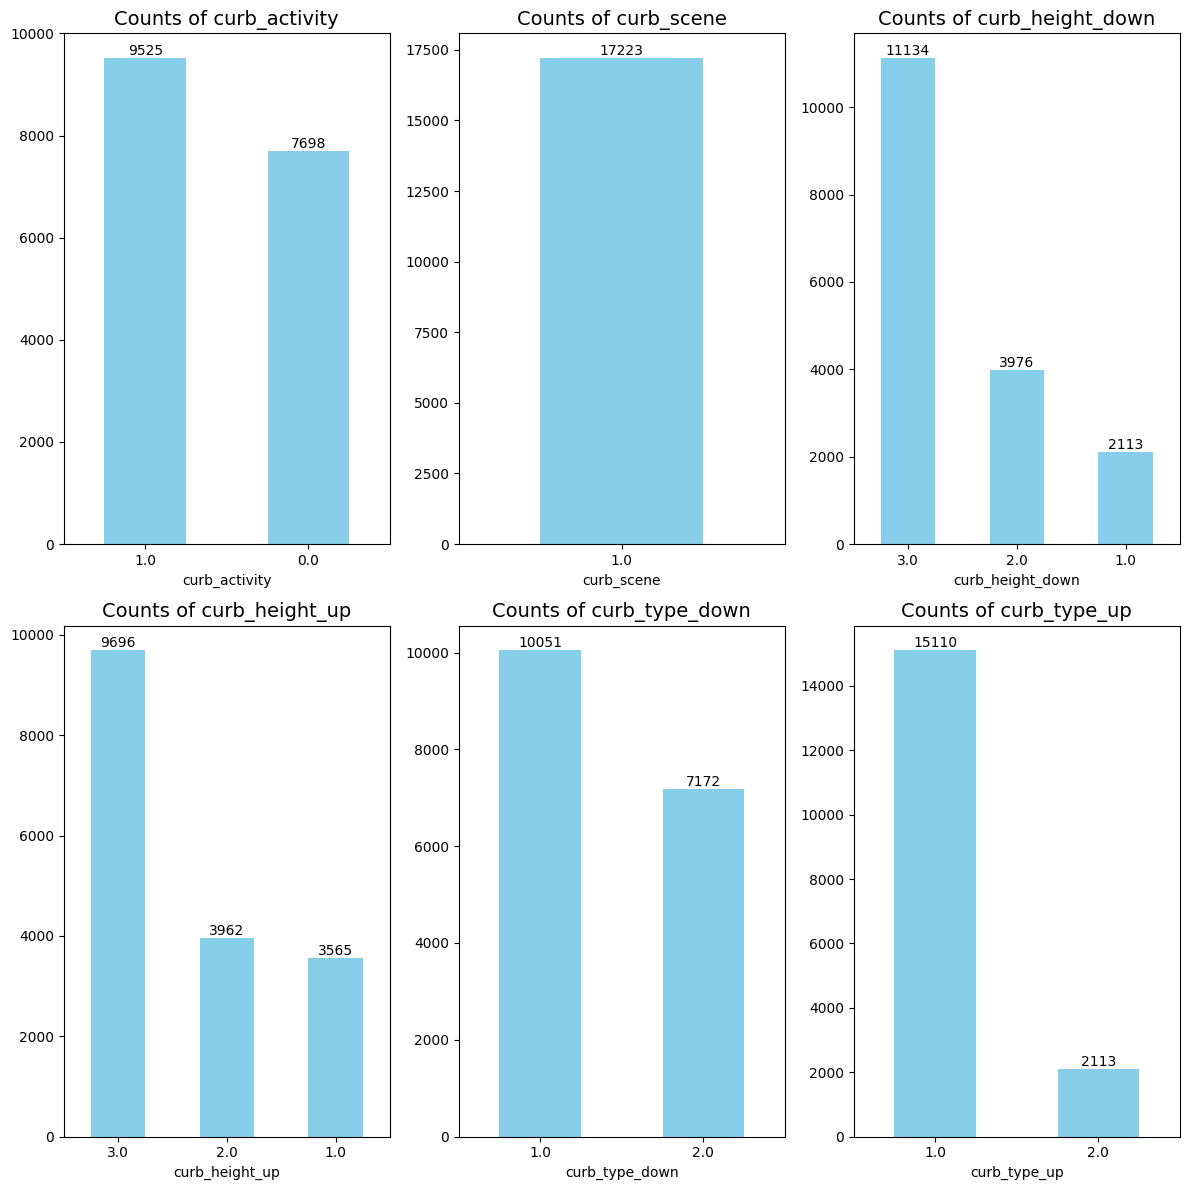

In [26]:
# List of attributes to visualize
attributes = ['curb_activity', 'curb_scene', 'curb_height_down', 'curb_height_up', 'curb_type_down', 'curb_type_up']

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through each attribute and create a bar chart
for i, attribute in enumerate(attributes):
    # Get value counts for the attribute
    attribute_counts = df_curb_scene[attribute].value_counts()

    # Plot the value counts as a bar chart
    bars = attribute_counts.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Counts of {attribute}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=0)

    # Add count numbers on top of the bars
    for bar in bars.patches:
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate
            bar.get_height() + 1,               # Y-coordinate (slightly above the bar)
            int(bar.get_height()),              # Text (the count)
            ha='center', va='bottom', fontsize=10
        )

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()